In [20]:
# Measure the distirbuiton

import json

result_5k = [json.loads(x) for x in open("/home/hyeonbin/iterpre/OLMo/olmo/exp/0722_eval_all_5000.jsonl")]
result_278k = [json.loads(x) for x in open("/home/hyeonbin/iterpre/OLMo/olmo/exp/0722_eval_all_278000.jsonl")]
result_557k = [json.loads(x) for x in open("/home/hyeonbin/iterpre/OLMo/olmo/exp/0722_eval_all_557000.jsonl")]

# # sort each by x['sample_idx]
# result_5k_sorted = sorted(result_5k, key=lambda x: (x['eval_idx'], x['sample_idx']))
# result_278k_sorted = sorted(result_278k, key=lambda x: (x['eval_idx'], x['sample_idx']))
# result_557k_sorted = sorted(result_557k, key=lambda x: (x['eval_idx'], x['sample_idx']))

Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x7fb92119d1f0>>
Traceback (most recent call last):
  File "/home/jiyeon/.conda/envs/olmo/lib/python3.9/site-packages/ipykernel/ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(
KeyboardInterrupt: 


In [ ]:
li_5k = [x for x in result_5k if 'validation' in x['task'] and 'c4' in x['metadata'][0]['label'].lower()]
li_278k = [x for x in result_278k if 'validation' in x['task'] and 'c4' in x['metadata'][0]['label'].lower()]
li_557k =  [x for x in result_557k if 'validation' in x['task'] and 'c4' in x['metadata'][0]['label'].lower()]

In [ ]:
# # ## Measure the distirbuiton

# import json
# import jsonlines

# with jsonlines.open("/home/hyeonbin/iterpre/OLMo/olmo/exp/OLMo-7B_ckpt_5000_validation_set_ppl_sorted.jsonl", "w") as writer:
#     writer.write_all(result_5k_sorted)

# with jsonlines.open("/home/hyeonbin/iterpre/OLMo/olmo/exp/OLMo-7B_ckpt_278000_validation_set_ppl_sorted.jsonl", "w") as writer:
#     writer.write_all(result_278k_sorted)

# with jsonlines.open("/home/hyeonbin/iterpre/OLMo/olmo/exp/OLMo-7B_ckpt_557000_validation_set_ppl_sorted.jsonl", "w") as writer:
#     writer.write_all(result_557k_sorted)

In [ ]:
# now let's plot

li1 = [x['loss'] for x in li_5k]
li2 = [x['loss'] for x in li_278k]
li3 = [x['loss'] for x in li_557k]

In [ ]:
li_5k[0].keys()

dict_keys(['input_ids', 'metadata', 'loss', 'task'])

In [ ]:
len(li_5k)
# len(li_5k[0]['input_ids'][0])


1933

In [ ]:
labels = [x['metadata'][0]['label'] for x in li_5k]
set(labels)

{'v2-small-c4_100_domains-validation',
 'v2-small-c4_en-validation',
 'v2-small-mc4_en-validation',
 'v3-small-c4_en-validation'}

In [ ]:
from collections import defaultdict
result = defaultdict(int)
for x in li_5k:
    result[x['metadata'][0]['label']] += 1
    
result

defaultdict(int,
            {'v3-small-c4_en-validation': 498,
             'v2-small-c4_100_domains-validation': 453,
             'v2-small-mc4_en-validation': 484,
             'v2-small-c4_en-validation': 498})

In [ ]:
import statistics

# Calculate various statistics
mean = statistics.mean(li1)
median = statistics.median(li1)
variance = statistics.variance(li1)
stdev = statistics.stdev(li1)

print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Variance: {variance}")
print(f"Standard Deviation: {stdev}")

Mean: 3.198368502045566
Median: 3.237203359603882
Variance: 0.2490774143794652
Standard Deviation: 0.49907656164106245


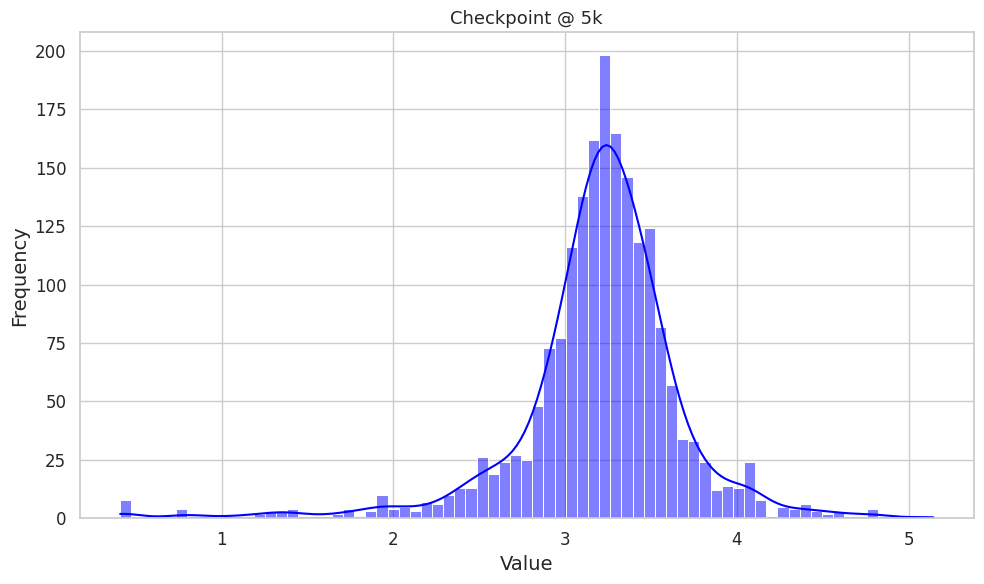

In [ ]:
# Plot histogram from 0 ~ 0.005
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Set the style
sns.set(style="whitegrid")

# Plot the histogram
plt.figure(figsize=(10, 6))
sns.histplot(li1, kde=True, color='blue')

# Add title and labels
plt.title('Checkpoint @ 5k', fontsize=13)
plt.xlabel('Value', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Customize ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

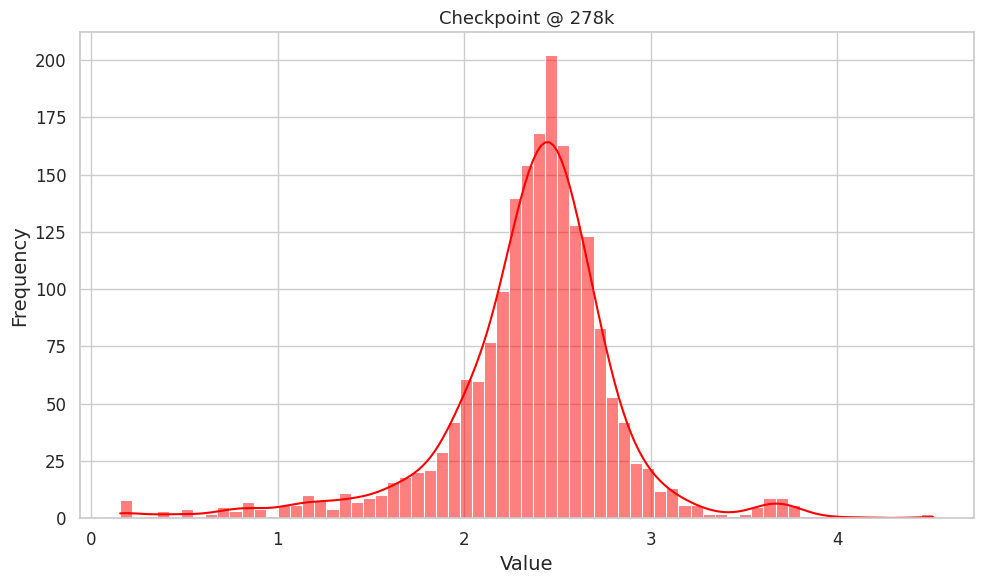

In [ ]:
# Plot histogram from 0 ~ 0.005
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Set the style
sns.set(style="whitegrid")

# Plot the histogram
plt.figure(figsize=(10, 6))
sns.histplot(li2, kde=True, color='red')

# Add title and labels
plt.title('Checkpoint @ 278k', fontsize=13)
plt.xlabel('Value', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Customize ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

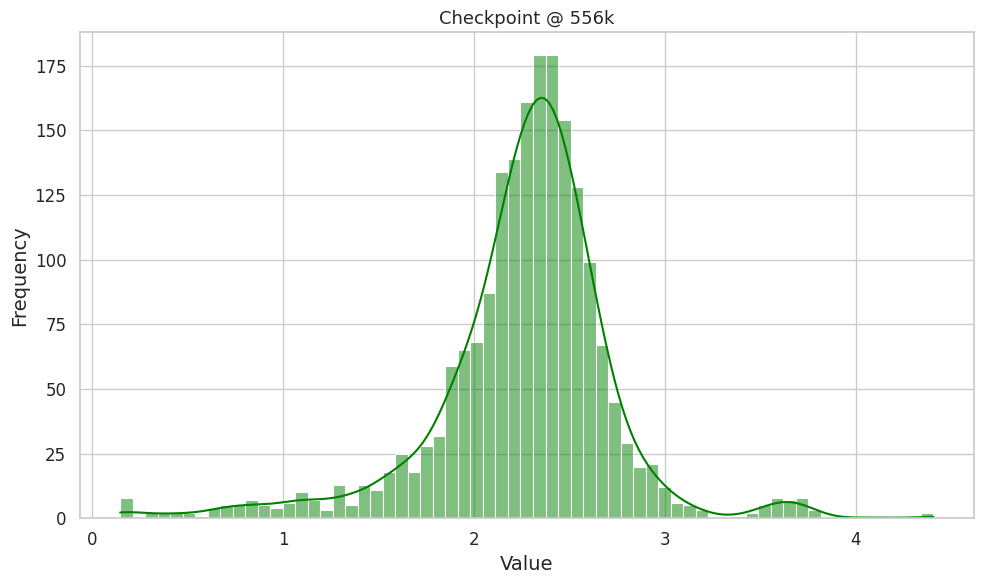

In [ ]:
# Plot histogram from 0 ~ 0.005
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Set the style
sns.set(style="whitegrid")

# Plot the histogram
plt.figure(figsize=(10, 6))
sns.histplot(li3, kde=True, color='green')

# Add title and labels
plt.title('Checkpoint @ 556k', fontsize=13)
plt.xlabel('Value', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Customize ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

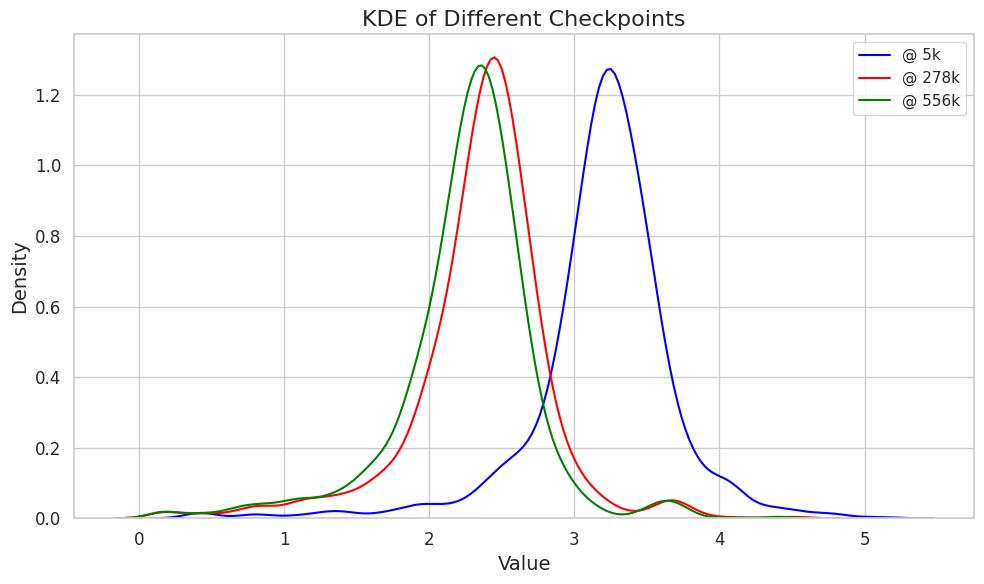

In [ ]:
# plot li1, li2, li3
# Set the style
sns.set(style="whitegrid")

# Plot the KDE for each list
plt.figure(figsize=(10, 6))
sns.kdeplot(li1, label='@ 5k', color='blue')
sns.kdeplot(li2, label='@ 278k', color='red')
sns.kdeplot(li3, label='@ 556k', color='green')

# Add title and labels
plt.title('KDE of Different Checkpoints', fontsize=16)
plt.xlabel('Value', fontsize=14)
plt.ylabel('Density', fontsize=14)

# Add legend
plt.legend()

# Customize ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
### Get files

import json

df1 = json.load(open("/home/hyeonbin/iterpre/OLMo/olmo/exp/eval_all_5000_summary.json"))
df2 = json.load(open("/home/hyeonbin/iterpre/OLMo/olmo/exp/eval_all_278000_summary.json"))
df3 = json.load(open("/home/hyeonbin/iterpre/OLMo/olmo/exp/eval_all_557000_summary.json"))


In [ ]:
# Cross Entropy Average

def get_summary(x):
    new_d = {}
    new_d['CE_Loss'] = []

    for k, v in x.items():
        if"CrossEntropyLoss" in k:
            new_d['CE_Loss'].append(v)
        elif "Perplexity" in k:
            pass
        else:
            new_d[k] = v

    return new_d

# for k in df1

In [ ]:
sum = get_summary(df2)
sum

{'CE_Loss': [0.8851879835128784,
  2.1850147247314453,
  2.5476105213165283,
  1.977208137512207,
  2.9451775550842285,
  2.4074013233184814,
  2.459911823272705,
  2.7260851860046387,
  2.0820188522338867,
  2.4143083095550537,
  2.2967095375061035,
  3.062084913253784,
  3.396742105484009,
  2.336442232131958,
  2.2826170921325684,
  2.1197993755340576,
  2.8048737049102783,
  2.289402961730957,
  2.775350332260132,
  2.4609696865081787,
  2.2301604747772217,
  1.9873353242874146,
  2.459315538406372,
  2.544816017150879],
 'eval/downstream/piqa_len_norm': 0.7823721170425415,
 'eval/downstream/hellaswag_len_norm': 0.618399977684021,
 'eval/downstream/winogrande_acc': 0.6408839821815491,
 'eval/downstream/openbook_qa_len_norm': 0.414000004529953,
 'eval/downstream/sciq_acc': 0.9290000200271606,
 'eval/downstream/arc_easy_acc': 0.7122806906700134,
 'eval/downstream/copa_acc': 0.8299999833106995,
 'eval/downstream/rte_len_norm': 0.4693140685558319,
 'eval/downstream/commitment_bank_acc'

In [ ]:
sum = get_summary(df1)
sum

{'CE_Loss': [1.4201509952545166,
  3.0684664249420166,
  3.5949161052703857,
  2.8103318214416504,
  3.6794135570526123,
  3.2331817150115967,
  3.2735531330108643,
  3.4413857460021973,
  2.8898935317993164,
  3.2597696781158447,
  3.4135591983795166,
  3.9448342323303223,
  4.0969624519348145,
  3.152151107788086,
  3.1843032836914062,
  2.714851140975952,
  3.577806234359741,
  3.411628246307373,
  3.4991371631622314,
  3.2809252738952637,
  3.087618350982666,
  2.8375821113586426,
  3.313232898712158,
  3.7747416496276855],
 'eval/downstream/piqa_len_norm': 0.6468988060951233,
 'eval/downstream/hellaswag_len_norm': 0.38040000200271606,
 'eval/downstream/winogrande_acc': 0.5114443302154541,
 'eval/downstream/openbook_qa_len_norm': 0.25600001215934753,
 'eval/downstream/sciq_acc': 0.6079999804496765,
 'eval/downstream/arc_easy_acc': 0.42105263471603394,
 'eval/downstream/copa_acc': 0.6499999761581421,
 'eval/downstream/rte_len_norm': 0.5198556184768677,
 'eval/downstream/commitment_b

In [ ]:
## CHECK
2160*278000/1000000000*2048

1229.78304

In [ ]:
# vllm
from vllm import LLM, SamplingParams

In [ ]:
model = LLM("allenai/OLMo-7B-hf", trust_remote_code=True)

In [ ]:
import json
li = [json.loads(x) for x in open("/home/hyeonbin/iterpre/OLMo/olmo/exp/0722_eval_all_557000.jsonl")]

In [ ]:
from transformers import AutoModelForCausalLM,AutoTokenizer, OlmoForCausalLM
from hf_olmo import OLMoForCausalLM, OLMoTokenizerFast

# olmo = OLMoForCausalLM.from_pretrained("allenai/OLMo-7B")
tokenizer = OLMoTokenizerFast.from_pretrained("allenai/OLMo-7B")

# model = OlmoForCausalLM.from_pretrained("allenai/OLMo-7B", trust_remote_code=True)

In [ ]:

import sys
sys.path.append("/home/hyeonbin/iterpre/OLMo")

from olmo.model import OLMo
from olmo.config import TrainConfig
from olmo.util import clean_opt
from olmo.checkpoint import load_state_dict

import torch
from transformers import AutoModelForCausalLM,AutoTokenizer, OlmoForCausalLM
from hf_olmo import OLMoForCausalLM, OLMoTokenizerFast

args_list = []
yaml_path = "/home/hyeonbin/iterpre/OLMo/configs/official/OLMo-7B.yaml"
cfg = TrainConfig.load(yaml_path, [clean_opt(s) for s in args_list])
cfg.model.init_device = f"cuda:0"
olmo_model = OLMo(cfg.model)
load_path = f"https://olmo-checkpoints.org/ai2-llm/olmo-medium/z4z0x4m9/step557000-unsharded/"
olmo_model = olmo_model.from_checkpoint(checkpoint_dir=load_path)


In [ ]:
print(olmo_model.transformer.blocks[0].attn_out.weight)


In [ ]:
inp = "Language Modeling is"
inp = tokenizer.encode(inp)[:-1]
inp = torch.LongTensor(inp).unsqueeze(0).to(torch.device("cuda:0"))
out = olmo_model.generate(inp, min_steps=10)

f = out.token_ids[0][0].detach().cpu().numpy().tolist()
print(tokenizer.decode(f))

In [ ]:
olmo_model.device

In [ ]:
ctx = tokenizer.decode(li[0]['ctx'][0])

In [ ]:
out = tokenizer.decode(li[0]['continuation'][0])

In [ ]:
if ckpt_num == 5000:
    load_path = f"https://olmo-checkpoints.org/ai2-llm/olmo-medium/wvc30anm/step5000-unsharded/"
elif ckpt_num == 278000:
    load_path = f"https://olmo-checkpoints.org/ai2-llm/olmo-medium/yuc5kl7s/step278000-unsharded/"
elif ckpt_num == 557000:
    load_path = f"https://olmo-checkpoints.org/ai2-llm/olmo-medium/z4z0x4m9/step557000-unsharded/"
else:
    raise AssertionError("Not Implemented Yet!")


In [ ]:
import sys
sys.path.append("/home/hyeonbin/iterpre/OLMo")

import torch
from transformers import AutoModelForCausalLM
import jsonlines
from tqdm.auto import tqdm
import argparse
from torch.nn import functional as F

from olmo.checkpoint import load_state_dict
from olmo.eval import build_evaluators
from olmo.config import TrainConfig
from olmo.util import clean_opt


load_path = f"https://olmo-checkpoints.org/ai2-llm/olmo-medium/z4z0x4m9/step557000-unsharded/"
ckpt = load_state_dict(
    load_path, "model.pt", local_cache=None, map_location="cpu"
)

# k = model.model.state_dict().keys()
# v = ckpt.values()

# d = {k_: v_ for k_, v_ in zip(k, v)}
# model.model.load_state_dict(d)

In [ ]:
import torch
sum(torch.sum(ckpt['transformer.blocks.0.att_proj.weight'][:4096, :] - model.model.layers[0].self_attn.q_proj.weight, axis=0).tolist())

In [ ]:
import torch
inp = "Language Modeling is "
inp = tok.encode(inp)[:-1]
inp = torch.LongTensor(inp).unsqueeze(0).to(torch.device("cuda:0"))
out = model.generate(inp, max_new_tokens=50, temperature=0, do_sample=False)

In [ ]:
print(tok.batch_decode(out, skip_special_tokens=True)[0])

In [ ]:
from hf_olmo import OLMoForCausalLM, OLMoTokenizerFast

olmo = OLMoForCausalLM.from_pretrained("allenai/OLMo-7B")
tokenizer = OLMoTokenizerFast.from_pretrained("allenai/OLMo-7B")
message = ["Language modeling is"]
inputs = tokenizer(message, return_tensors='pt', return_token_type_ids=False)
# optional verifying cuda
inputs = {k: v.to('cuda') for k,v in inputs.items()}
olmo = olmo.to('cuda')
response = olmo.generate(**inputs, max_new_tokens=100, do_sample=True, top_k=50, top_p=0.95)
print(tokenizer.batch_decode(response, skip_special_tokens=True)[0])

In [ ]:
def dec(x):
    print(tokenizer.decode(x[0]))

dec(li[0]['input_ids'])

In [ ]:
li[1].keys()

In [ ]:
tokenizer.decode(li[0]['label_id'])

In [ ]:
model = model.from_checkpoint(checkpoint_dir=load_path)
model.config.name = "OLMo-7B"

In [ ]:
model.transformer.blocks[0]

In [ ]:
ckpt.keys()

In [ ]:
ckpt["transformer.blocks.13.att_proj.weight"]

In [ ]:
model.transformer.blocks[13].att_proj.weight

In [ ]:
from olmo.checkpoint import load_state_dict
from olmo.eval import build_evaluators
from olmo.config import TrainConfig
from olmo.util import clean_opt
from olmo.model import OLMo

yaml_path = "/home/hyeonbin/iterpre/OLMo/configs/official/OLMo-7B.yaml"
args_list = []
cfg = TrainConfig.load(yaml_path, [clean_opt(s) for s in args_list])
cfg.device_eval_batch_size = 1
cfg.model.init_device = f"cuda:1"
ckpt_num = 557000

# [Todo] Organize code later.
if ckpt_num == 5000:
    load_path = f"https://olmo-checkpoints.org/ai2-llm/olmo-medium/wvc30anm/step5000-unsharded/"
elif ckpt_num == 278000:
    load_path = f"https://olmo-checkpoints.org/ai2-llm/olmo-medium/yuc5kl7s/step278000-unsharded/"
elif ckpt_num == 557000:
    load_path = f"https://olmo-checkpoints.org/ai2-llm/olmo-medium/z4z0x4m9/step557000-unsharded/"
else:
    raise AssertionError("Not Implemented Yet!")

model = OLMo(cfg.model)
model = model.from_checkpoint(checkpoint_dir=load_path)

In [ ]:
cfg.model.n_heads

In [ ]:
olmo_config

In [ ]:
olmo_config = cfg.model
n_layers = 32
n_layers = olmo_config.n_layers
n_heads = olmo_config.n_heads
dim = olmo_config.d_model
loaded = ckpt
dims_per_head = dim // n_heads
base = 10000.0
inv_freq = 1.0 / (base ** (torch.arange(0, dims_per_head, 2).float() / dims_per_head))


if olmo_config.n_kv_heads is not None:
    num_key_value_heads = olmo_config.n_kv_heads  # for GQA / MQA
elif olmo_config.multi_query_attention:  # compatibility with other checkpoints
    num_key_value_heads = 1
else:
    num_key_value_heads = n_heads

dims_per_head = dim // n_heads
state_dict = {}
for layer_i in range(n_layers):
    filename = f"pytorch_model-{layer_i + 1}-of-{n_layers + 1}.bin"
    # Unsharded
    # TODO: Layernorm stuff
    # TODO: multi query attention
    fused_dims = [dim, dims_per_head * num_key_value_heads, dims_per_head * num_key_value_heads]
    q_proj_weight, k_proj_weight, v_proj_weight = torch.split(
        loaded[f"transformer.blocks.{layer_i}.att_proj.weight"], fused_dims, dim=0
    )
    up_proj_weight, gate_proj_weight = torch.chunk(
        loaded[f"transformer.blocks.{layer_i}.ff_proj.weight"], 2, dim=0
    )
    state_dict.update({
        f"model.layers.{layer_i}.self_attn.q_proj.weight": q_proj_weight,
        f"model.layers.{layer_i}.self_attn.k_proj.weight": k_proj_weight,
        f"model.layers.{layer_i}.self_attn.v_proj.weight": v_proj_weight,
        f"model.layers.{layer_i}.self_attn.o_proj.weight": loaded[
            f"transformer.blocks.{layer_i}.attn_out.weight"
        ],
        f"model.layers.{layer_i}.mlp.gate_proj.weight": gate_proj_weight,
        f"model.layers.{layer_i}.mlp.down_proj.weight": loaded[f"transformer.blocks.{layer_i}.ff_out.weight"],
        f"model.layers.{layer_i}.mlp.up_proj.weight": up_proj_weight,
    })

    # state_dict[f"model.layers.{layer_i}.self_attn.rotary_emb.inv_freq"] = inv_freq

state_dict.update({
    "model.embed_tokens.weight": loaded["transformer.wte.weight"],
    "lm_head.weight": loaded["transformer.ff_out.weight"]
    if "transformer.ff_out.weight" in loaded
    else loaded["transformer.wte.weight"],
})

In [ ]:
m.load_state_dict(state_dict)

In [ ]:
import torch
inp = "Language Modeling is "
inp = tok.encode(inp)[:-1]
inp = torch.LongTensor(inp).unsqueeze(0).to(torch.device("cuda:0"))
out = m.generate(inp, max_new_tokens=50, temperature=0, do_sample=False)

In [ ]:
# loss 비교 필요.. 할지도...

In [ ]:
print(tok.decode(inp[0].detach().cpu().numpy().tolist()))
# print(tok.decode(f.detach().cpu().numpy().tolist()))
final_out = out[0].detach().cpu().numpy().tolist()
print(tok.decode(final_out))

In [ ]:
import json

In [ ]:
# Measure the distirbuiton

import json

result_5k = [json.loads(x) for x in open("/home/hyeonbin/iterpre/OLMo/olmo/exp/OLMo-7B_ckpt_5000_validation_set_ppl.jsonl")]
result_278k = [json.loads(x) for x in open("/home/hyeonbin/iterpre/OLMo/olmo/exp/OLMo-7B_ckpt_278000_validation_set_ppl.jsonl")]
result_557k = [json.loads(x) for x in open("/home/hyeonbin/iterpre/OLMo/olmo/exp/OLMo-7B_ckpt_557000_validation_set_ppl.jsonl")]

# sort each by x['sample_idx]
result_5k_sorted = sorted(result_5k, key=lambda x: (x['eval_idx'], x['sample_idx']))
result_278k_sorted = sorted(result_278k, key=lambda x: (x['eval_idx'], x['sample_idx']))
result_557k_sorted = sorted(result_557k, key=lambda x: (x['eval_idx'], x['sample_idx']))

In [ ]:
# # ## Measure the distirbuiton

# import json
# import jsonlines

# with jsonlines.open("/home/hyeonbin/iterpre/OLMo/olmo/exp/OLMo-7B_ckpt_5000_validation_set_ppl_sorted.jsonl", "w") as writer:
#     writer.write_all(result_5k_sorted)

# with jsonlines.open("/home/hyeonbin/iterpre/OLMo/olmo/exp/OLMo-7B_ckpt_278000_validation_set_ppl_sorted.jsonl", "w") as writer:
#     writer.write_all(result_278k_sorted)

# with jsonlines.open("/home/hyeonbin/iterpre/OLMo/olmo/exp/OLMo-7B_ckpt_557000_validation_set_ppl_sorted.jsonl", "w") as writer:
#     writer.write_all(result_557k_sorted)

In [ ]:
# now let's plot

li1 = [x['loss'] for x in result_5k_sorted]
li2 = [x['loss'] for x in result_278k_sorted]
li3 = [x['loss'] for x in result_557k_sorted]

In [ ]:
import statistics

# Calculate various statistics
mean = statistics.mean(li1)
median = statistics.median(li1)
variance = statistics.variance(li1)
stdev = statistics.stdev(li1)

print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Variance: {variance}")
print(f"Standard Deviation: {stdev}")

In [ ]:
# Plot histogram from 0 ~ 0.005
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Set the style
sns.set(style="whitegrid")

# Plot the histogram
plt.figure(figsize=(10, 6))
sns.histplot(li1, bins=np.linspace(0, 0.005, 50), kde=True, color='blue')

# Add title and labels
plt.title('Checkpoint @ 5k', fontsize=13)
plt.xlabel('Value', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Customize ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
# Plot histogram from 0 ~ 0.005
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Set the style
sns.set(style="whitegrid")

# Plot the histogram
plt.figure(figsize=(10, 6))
sns.histplot(li2, bins=np.linspace(0, 0.005, 50), kde=True, color='red')

# Add title and labels
plt.title('Checkpoint @ 278k', fontsize=13)
plt.xlabel('Value', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Customize ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
# Plot histogram from 0 ~ 0.005
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Set the style
sns.set(style="whitegrid")

# Plot the histogram
plt.figure(figsize=(10, 6))
sns.histplot(li3, bins=np.linspace(0, 0.01, 50), kde=True, color='green')

# Add title and labels
plt.title('Checkpoint @ 556k', fontsize=13)
plt.xlabel('Value', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Customize ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
# plot li1, li2, li3
# Set the style
sns.set(style="whitegrid")

# Plot the KDE for each list
plt.figure(figsize=(10, 6))
sns.kdeplot(li1, label='@ 5k', color='blue')
sns.kdeplot(li2, label='@ 278k', color='red')
sns.kdeplot(li3, label='@ 556k', color='green')

# Add title and labels
plt.title('KDE of Different Checkpoints', fontsize=16)
plt.xlabel('Value', fontsize=14)
plt.ylabel('Density', fontsize=14)

# Add legend
plt.legend()

# Customize ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
### Get files

import json

df1 = json.load(open("/home/hyeonbin/iterpre/OLMo/olmo/exp/eval_all_5000_summary.json"))
df2 = json.load(open("/home/hyeonbin/iterpre/OLMo/olmo/exp/eval_all_278000_summary.json"))
df3 = json.load(open("/home/hyeonbin/iterpre/OLMo/olmo/exp/eval_all_557000_summary.json"))


In [ ]:
# Cross Entropy Average

def get_summary(x):
    new_d = {}
    new_d['CE_Loss'] = []

    for k, v in x.items():
        if"CrossEntropyLoss" in k:
            new_d['CE_Loss'].append(v)
        elif "Perplexity" in k:
            pass
        else:
            new_d[k] = v

    return new_d

for k in df1

In [ ]:
## CHECK

In [ ]:
# vllm
from vllm import LLM, SamplingParams

In [ ]:
model = LLM("allenai/OLMo-7B-hf", trust_remote_code=True)

In [ ]:
import json
li = [json.loads(x) for x in open("/home/hyeonbin/iterpre/OLMo/olmo/exp/0722_eval_all_557000.jsonl")]

In [ ]:
from transformers import AutoModelForCausalLM,AutoTokenizer, OlmoForCausalLM
from hf_olmo import OLMoForCausalLM, OLMoTokenizerFast

# olmo = OLMoForCausalLM.from_pretrained("allenai/OLMo-7B")
tokenizer = OLMoTokenizerFast.from_pretrained("allenai/OLMo-7B")

# model = OlmoForCausalLM.from_pretrained("allenai/OLMo-7B", trust_remote_code=True)

In [ ]:

import sys
sys.path.append("/home/hyeonbin/iterpre/OLMo")

from olmo.model import OLMo
from olmo.config import TrainConfig
from olmo.util import clean_opt
from olmo.checkpoint import load_state_dict

import torch
from transformers import AutoModelForCausalLM,AutoTokenizer, OlmoForCausalLM
from hf_olmo import OLMoForCausalLM, OLMoTokenizerFast

args_list = []
yaml_path = "/home/hyeonbin/iterpre/OLMo/configs/official/OLMo-7B.yaml"
cfg = TrainConfig.load(yaml_path, [clean_opt(s) for s in args_list])
cfg.model.init_device = f"cuda:0"
olmo_model = OLMo(cfg.model)
load_path = f"https://olmo-checkpoints.org/ai2-llm/olmo-medium/z4z0x4m9/step557000-unsharded/"
olmo_model = olmo_model.from_checkpoint(checkpoint_dir=load_path)


In [ ]:
print(olmo_model.transformer.blocks[0].attn_out.weight)


In [ ]:
inp = "Language Modeling is"
inp = tokenizer.encode(inp)[:-1]
inp = torch.LongTensor(inp).unsqueeze(0).to(torch.device("cuda:0"))
out = olmo_model.generate(inp, min_steps=10)

f = out.token_ids[0][0].detach().cpu().numpy().tolist()
print(tokenizer.decode(f))

In [ ]:
olmo_model.device

In [ ]:
ctx = tokenizer.decode(li[0]['ctx'][0])

In [ ]:
out = tokenizer.decode(li[0]['continuation'][0])

In [ ]:
if ckpt_num == 5000:
    load_path = f"https://olmo-checkpoints.org/ai2-llm/olmo-medium/wvc30anm/step5000-unsharded/"
elif ckpt_num == 278000:
    load_path = f"https://olmo-checkpoints.org/ai2-llm/olmo-medium/yuc5kl7s/step278000-unsharded/"
elif ckpt_num == 557000:
    load_path = f"https://olmo-checkpoints.org/ai2-llm/olmo-medium/z4z0x4m9/step557000-unsharded/"
else:
    raise AssertionError("Not Implemented Yet!")


In [ ]:
import torch
inp = "Language Modeling is "
inp = tok.encode(inp)[:-1]
inp = torch.LongTensor(inp).unsqueeze(0).to(torch.device("cuda:0"))
out = model.generate(inp, max_new_tokens=50, temperature=0, do_sample=False)

In [ ]:
print(tok.batch_decode(out, skip_special_tokens=True)[0])

In [ ]:
from hf_olmo import OLMoForCausalLM, OLMoTokenizerFast

olmo = OLMoForCausalLM.from_pretrained("allenai/OLMo-7B")
tokenizer = OLMoTokenizerFast.from_pretrained("allenai/OLMo-7B")
message = ["Language modeling is"]
inputs = tokenizer(message, return_tensors='pt', return_token_type_ids=False)
# optional verifying cuda
inputs = {k: v.to('cuda') for k,v in inputs.items()}
olmo = olmo.to('cuda')
response = olmo.generate(**inputs, max_new_tokens=100, do_sample=True, top_k=50, top_p=0.95)
print(tokenizer.batch_decode(response, skip_special_tokens=True)[0])

In [ ]:
def dec(x):
    print(tokenizer.decode(x[0]))

dec(li[0]['input_ids'])

In [ ]:
li[1].keys()

In [ ]:
tokenizer.decode(li[0]['label_id'])

In [ ]:
import torch
from transformers import AutoTokenizer
from olmo.tokenizer import Tokenizer
# tok = Tokenizer.from_train_config(cfg)
model.to(torch.device("cuda:1"))
print()
tok = AutoTokenizer.from_pretrained("allenai/OLMo-7B-hf", trust_remote_code=True)

In [ ]:
import torch
inp = "Hi. How are you doing today?\n"
inp = tok.encode(inp, return_tensors='pt')
inp = torch.LongTensor(inp).to(cfg.model.init_device)
model.eval()

with torch.no_grad():
    out = model.generate(inp)

In [ ]:
print(tok.decode(inp[0].detach().cpu().numpy().tolist()))
# print(tok.decode(f.detach().cpu().numpy().tolist()))
final_out = out.token_ids[0][0].detach().cpu().numpy().tolist()
print(tok.decode(final_out))

In [ ]:
out.token_ids[0][0].detach().cpu().numpy().tolist()

In [ ]:
import torch
from transformers import AutoTokenizer
from olmo.tokenizer import Tokenizer
# tok = Tokenizer.from_train_config(cfg)
model.to(torch.device("cuda:1"))
print()
tok = AutoTokenizer.from_pretrained("allenai/OLMo-7B-hf", trust_remote_code=True)

In [ ]:
import torch
inp = "Hi. How are you doing today?\n"
inp = tok.encode(inp, return_tensors='pt')
inp = torch.LongTensor(inp).to(cfg.model.init_device)
model.eval()

with torch.no_grad():
    out = model.generate(inp)

In [ ]:
print(tok.decode(inp[0].detach().cpu().numpy().tolist()))
# print(tok.decode(f.detach().cpu().numpy().tolist()))
final_out = out.token_ids[0][0].detach().cpu().numpy().tolist()
print(tok.decode(final_out))

In [ ]:
#####
from transformers import AutoModelForCausalLM, AutoTokenizer
from transformers import AutoTokenizer, AutoModelForCausalLM, OlmoForCausalLM
import torch

tok = AutoTokenizer.from_pretrained("allenai/OLMo-7B-hf", trust_remote_code=True)
m = AutoModelForCausalLM.from_pretrained("allenai/OLMo-7B-hf", trust_remote_code=True)

m.to(torch.device("cuda:0"))
print()
# model.model.load_state_dict()

In [ ]:
import torch
inp = "Hi. How are you doing today?\n"
inp = tok.encode(inp, return_tensors='pt')
inp = torch.LongTensor(inp).to(torch.device("cuda:0"))
model.eval()

with torch.no_grad():
    out = m.generate(inp, max_new_tokens=16)

In [ ]:
final_out = out[0].detach().cpu().numpy().tolist()
print(tok.decode(final_out))

In [ ]:
load_path = f"https://olmo-checkpoints.org/ai2-llm/olmo-medium/z4z0x4m9/step557000-unsharded/"
ckpt = load_state_dict(
    load_path, "model.pt", local_cache=None, map_location="cpu"
)

In [ ]:
python scripts/convert_olmo_to_hf_new.py --input_dir "https://olmo-checkpoints.org/ai2-llm/olmo-medium/z4z0x4m9/step557000-unsharded/" --output_dir "/home/hyeonbin/iterpre/OLMo/checkpoints"  --tokenizer_json_path tokenizers/allenai_gpt-neox-olmo-dolma-v1_5.json

In [ ]:
m.model.layers[13].mlp.down_proj.weight
model.transformer.blocks[13].ff_out.weight

In [ ]:
model.transformer.blocks[13].ff_out.weight

In [ ]:
from transformers import AutoTokenizer

In [ ]:
from transformers import AutoTokenizer

tok = AutoTokenizer.from_pretrained("allenai/olmo-7b-hf")

In [ ]:
from datasets import load_dataset

# English only
en = load_dataset("allenai/c4", "en", streaming=True)

In [ ]:
from tqdm.auto import tqdm
import jsonlines

texts = []
i = 0
for x in tqdm(en['train']):
    texts.append(x)  
    i += 1

    if i % 100000 == 0:
        with jsonlines.open("/home/hyeonbin/iterpre/OLMo/olmo/texts.jsonl", "a") as f:
            f.write_all(texts)
        texts = []

In [ ]:
import json
li = [json.loads(x)['text'] for x in open("/home/hyeonbin/iterpre/OLMo/olmo/texts.jsonl")]

In [ ]:
import random
random.seed(42)
random.shuffle(li)

In [ ]:
from transformers import AutoTokenizer
# Initialize the tokenizer
tokenizer = AutoTokenizer.from_pretrained("allenai/olmo-7b-hf", use_fast=True)

In [ ]:
import json
from tqdm.auto import tqdm
from transformers import AutoTokenizer

# Example list of texts
# Initialize the progress bar
progress_bar = tqdm(total=len(li), desc="Tokenizing")
all_li = []
# Define a function to update the progress bar and save to a JSONL file
def tokenize_with_progress(texts, tokenizer, file_path, batch_size=100000):
    with open(file_path, 'a') as f:
        for i in range(0, len(texts), batch_size):
            batch = texts[i:i+batch_size]
            tokenized_batch = tokenizer.batch_encode_plus(batch)
            all_li.append(tokenized_batch)

            import jsonlines
            with jsonlines.open(file_path, "a") as writer:
                writer.write({"batched_result": tokenized_batch['input_ids']})

            progress_bar.update(len(batch))
            f.flush()

# Path to save the tokenized batches
output_file = '/home/hyeonbin/iterpre/OLMo/olmo/tokens.jsonl'

# Batch tokenize the texts with progress tracking and save to JSONL file
tokenize_with_progress(li, tokenizer, output_file)

# Close the progress bar
progress_bar.close()


In [ ]:
dset

In [ ]:
ckpt_num = 557000
import json
already_done = [json.loads(x) for x in open(f"/home/hyeonbin/iterpre/OLMo/olmo/exp/0722_eval_all_{ckpt_num}.jsonl")]


In [ ]:
import json
li = [json.loads(x) for x in open("/home/hyeonbin/iterpre/OLMo/olmo/tokens.jsonl")]

In [ ]:
# from 2D to 1D
final_li = [x['batched_result'] for x in li]
from itertools import chain
final_li = list(chain.from_iterable(final_li))

In [ ]:
from tqdm.auto import tqdm

# Initialize lists to store all tokens and their lengths
eos = 50279
chunk_size = 2048
left_over = []

final_chunks = []
curr_chunk = []

# Tokenize in batches

curr_chunk = [] 

for idx, tok in tqdm(enumerate(final_li)):
    final_li[idx] = tok + [eos] # eos token

tokens_flat = list(chain.from_iterable(final_li))

i = 0

while i < len(tokens_flat):
    chunk = tokens_flat[i:i+chunk_size]

    if chunk[0] == eos:
        i += 1
        chunk = tokens_flat[i:i+chunk_size]
    
    final_chunks.append(chunk)
    i += chunk_size

In [ ]:
# save into a dataset format
final_dset = {"input_ids": final_chunks}

from datasets import Dataset
dset = Dataset.from_dict(final_dset)

In [ ]:
import json
li = [json.loads(x) for x in open("/home/hyeonbin/iterpre/OLMo_C4_Infer_Result/eval_557000.jsonl")]

In [ ]:
from transformers import AutoTokenizer, AutoModelForCausalLM

tok = AutoTokenizer.from_pretrained("allenai/OLMo-7B-hf", trust_remote_code=True)
model = AutoModelForCausalLM.from_pretrained("allenai/OLMo-7B-hf", trust_remote_code=True)


Loading checkpoint shards:   0%|          | 0/6 [00:00<?, ?it/s]

In [ ]:
import torch
dev = torch.device("cuda:0")
model.eval()
model.to(dev)
print()

In [ ]:
from datasets import Dataset

dset = Dataset.load_from_disk("/home/hyeonbin/iterpre/OLMo_C4_data")

Loading dataset from disk:   0%|          | 0/21 [00:00<?, ?it/s]

In [ ]:
# t = torch.LongTensor(dset[0:4]['input_ids']).to(dev)

e = torch.LongTensor(dset[1:2]['input_ids']).to(dev)

In [ ]:
with torch.no_grad():
    out = model(t, labels=t)
    # out1 = model(e, labels=e)


In [ ]:
import torch.nn.functional as F
def get_loss_and_probabilities(outputs, inp):
    with torch.no_grad():
        logits = outputs.logits
        real_loss = outputs.loss.item()

        # Compute per-token loss
        shift_logits = logits[..., :-1, :].contiguous()
        shift_labels = inp[..., 1:].contiguous()

        loss_fct = torch.nn.CrossEntropyLoss(reduction='none')
        per_token_loss = loss_fct(shift_logits.view(-1, shift_logits.size(-1)), shift_labels.view(-1))
        per_token_loss = per_token_loss.view(shift_labels.size()).detach().cpu().numpy().tolist()

        # Convert logits to probabilities
        shift_probs = F.softmax(shift_logits, dim=-1)
        # Get the probabilities of the actual next tokens
        shift_labels_unsqueezed = shift_labels.unsqueeze(-1)
        token_probs = torch.gather(shift_probs, 2, shift_labels_unsqueezed).squeeze(-1).detach().cpu().numpy().tolist()

    return real_loss, per_token_loss, token_probs

# t1 = get_loss_and_probabilities(out, t)

In [ ]:
t2 = get_loss_and_probabilities(out1, e)

In [ ]:
a = t1[1][1]
b = t2[1][0]

In [ ]:
ee = []
for x, y in zip(a, b):
    ee.append(abs(x-y))

In [ ]:
sum(ee)

0.011431925930082798

In [ ]:
sum(a)

4678.054395581181

In [ ]:
sum(b)

4678.055059796949

In [ ]:
import json
from transformers import AutoTokenizer


tok = AutoTokenizer.from_pretrained("allenai/olmo-7b-hf")

li = []

f = open("/home/hyeonbin/iterpre/OLMo_C4_Infer_Result/eval_557000.jsonl").readlines()[:100]

for x in f:
    try:
        li.append(json.loads(x))
    except:
        print("[Error] Skipping ...")


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.0 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "/home/jiyeon/.conda/envs/olmo/lib/python3.9/runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/home/jiyeon/.conda/envs/olmo/lib/python3.9/runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "/home/jiyeon/.conda/envs/olmo/lib/python3.9/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "/home/jiyeon/.conda/envs/olmo/lib/python3.9/site-packages/traitlets/config/application.py", line 1075, in launch_instance
 

tokenizer_config.json:   0%|          | 0.00/5.37k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.12M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/65.0 [00:00<?, ?B/s]

In [1]:
import json

li = []

f = open("/home/hyeonbin/eval_557k_ckpt_330k_data.jsonl")

for x in f:
    try:
        li.append(json.loads(x))
    except:
        print("[Error] Skipping ...")

In [ ]:
li_loss = [x['loss'] for x in li]

In [7]:
idx_map = {x['sample_idx']:x['sample'] for x in li}
idx_map[17]

[4791,
 394,
 659,
 15,
 322,
 904,
 32237,
 15,
 2213,
 677,
 569,
 403,
 3058,
 15,
 22373,
 9752,
 8373,
 3024,
 387,
 17653,
 15,
 10352,
 3024,
 33,
 84,
 5830,
 15,
 12312,
 390,
 1067,
 39802,
 14,
 21,
 33648,
 15,
 26779,
 670,
 1959,
 5300,
 2130,
 949,
 253,
 530,
 15,
 52,
 15,
 15023,
 10518,
 13500,
 281,
 1361,
 368,
 2098,
 13,
 8027,
 13,
 8722,
 13,
 285,
 1756,
 634,
 2136,
 15,
 9872,
 982,
 27,
 11198,
 14807,
 321,
 451,
 2440,
 13,
 1355,
 2136,
 8362,
 13,
 2208,
 34602,
 13,
 1355,
 2136,
 5306,
 6787,
 13,
 15394,
 7355,
 13,
 285,
 5213,
 5454,
 15,
 187,
 20968,
 8373,
 982,
 27,
 1198,
 7747,
 13,
 818,
 268,
 15,
 78,
 904,
 10063,
 26250,
 3729,
 25474,
 273,
 11864,
 14,
 2861,
 14622,
 5259,
 11397,
 13,
 39739,
 427,
 15,
 56,
 15,
 20189,
 19672,
 15,
 7648,
 13,
 533,
 12960,
 310,
 2424,
 15,
 9368,
 22856,
 14,
 25,
 36936,
 15,
 26779,
 253,
 30486,
 273,
 9451,
 1569,
 13,
 752,
 3570,
 9451,
 26160,
 452,
 13,
 253,
 16022,
 281,
 1110,
 3570,
 

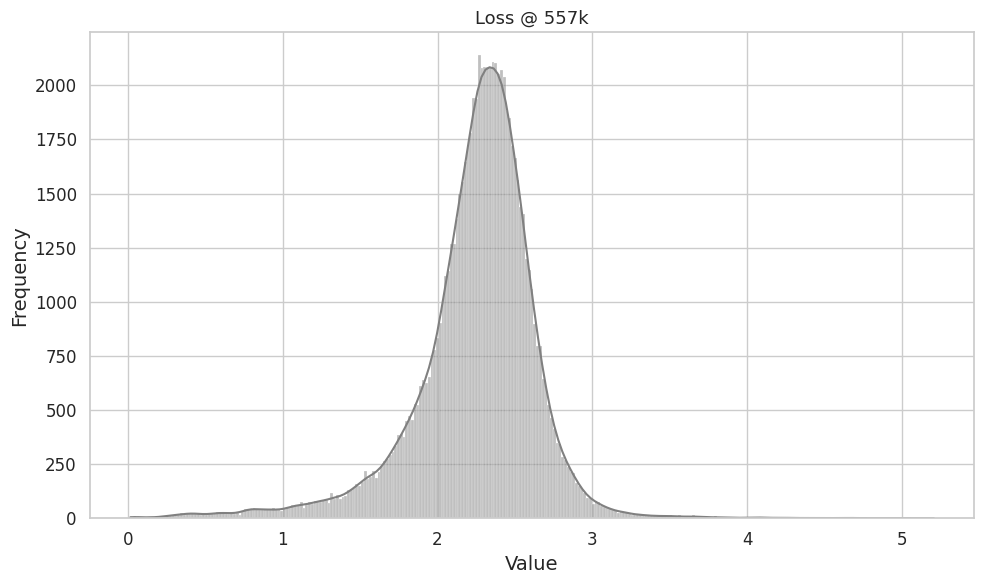

In [ ]:
# Plot histogram from 0 ~ 0.005
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Set the style
sns.set(style="whitegrid")

# Plot the histogram
plt.figure(figsize=(10, 6))
sns.histplot(li_loss, kde=True, color='grey')

# Add title and labels
plt.title('Loss @ 557k', fontsize=13)
plt.xlabel('Value', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Customize ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
import statistics

# Calculate various statistics
mean = statistics.mean(li_loss)
median = statistics.median(li_loss)
variance = statistics.variance(li_loss)
stdev = statistics.stdev(li_loss)

print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Variance: {variance}")
print(f"Standard Deviation: {stdev}")

Mean: 2.2478889744379047
Median: 2.299283504486084
Variance: 0.15856698038553557
Standard Deviation: 0.39820469658899754


In [2]:
li[0].keys()

dict_keys(['sample_idx', 'sample', 'loss', 'per_token_loss', 'token_probabilities'])

In [3]:
# Step 1: Sort the list by the 'loss' value
sorted_data = sorted(li, key=lambda x: x['loss'])

# Step 2: Determine the indices for the chunks
n = len(sorted_data)
top_40_percent_index = int(n * 0.4)
middle_20_percent_index = int(n * 0.6)

# Step 3: Slice the sorted list into chunks
top_40_percent_chunk = sorted_data[:top_40_percent_index]
middle_20_percent_chunk = sorted_data[top_40_percent_index:middle_20_percent_index]
bottom_40_percent_chunk = sorted_data[middle_20_percent_index:]

# Verify the sizes
print(f"Top 40% chunk size: {len(top_40_percent_chunk)}")
print(f"Middle 20% chunk size: {len(middle_20_percent_chunk)}")
print(f"Bottom 40% chunk size: {len(bottom_40_percent_chunk)}")

Top 40% chunk size: 31989
Middle 20% chunk size: 15995
Bottom 40% chunk size: 31990


In [24]:
top40 = {'input_ids': [x['sample'] for x in top_40_percent_chunk]}

from datasets import Dataset
dset = Dataset.from_dict(top40)
dset.save_to_disk("/mnt/nas/jiyeon/OLMo/data/c4_dataset_train/557000_easy")

Saving the dataset (0/1 shards):   0%|          | 0/31989 [00:00<?, ? examples/s]

In [26]:
bottom40 = {'input_ids': [x['sample'] for x in bottom_40_percent_chunk]}

from datasets import Dataset
dset = Dataset.from_dict(bottom40)
dset.save_to_disk("/mnt/nas/jiyeon/OLMo/data/c4_dataset_train/557000_hard")

Saving the dataset (0/1 shards):   0%|          | 0/31990 [00:00<?, ? examples/s]

In [4]:
import random
import torch
import pickle

# Step 1: Randomly select 2000 instances from middle_20_percent_chunk
selected_instances = random.sample(middle_20_percent_chunk, 2000)
selected_instances_tensor = [torch.tensor(x['sample']) for x in selected_instances]

# Step 2: Split the selected instances into two parts
repeated_instances = selected_instances_tensor[:1000]
chunked_instances = selected_instances_tensor[1000:]

# Ensure chunked_instances is exactly 1000 instances
assert len(chunked_instances) == 1000

# Step 3: Divide chunked_instances into 10 groups of 100 instances each
chunks_of_100 = [chunked_instances[i:i+100] for i in range(0, len(chunked_instances), 100)]

# Step 4: Create 10 lists, each containing 1100 instances
final_lists = {}
for i in range(10):
    new_list = repeated_instances + chunks_of_100[i]
    final_lists[i] = new_list

# Verify each list
for idx, (k, lst) in enumerate(final_lists.items()):
    print(f"List {idx+1} size: {len(lst)}")


fname = f"/mnt/nas/jiyeon/OLMo/data/c4_dataset_train/inject_evalset.pkl"
with open(fname, 'wb') as f:
    pickle.dump(final_lists, f)



A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.0 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "/home/jiyeon/.conda/envs/olmo/lib/python3.9/runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/home/jiyeon/.conda/envs/olmo/lib/python3.9/runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "/home/jiyeon/.conda/envs/olmo/lib/python3.9/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "/home/jiyeon/.conda/envs/olmo/lib/python3.9/site-packages/traitlets/config/application.py", line 1075, in launch_instance
 

List 1 size: 1100
List 2 size: 1100
List 3 size: 1100
List 4 size: 1100
List 5 size: 1100
List 6 size: 1100
List 7 size: 1100
List 8 size: 1100
List 9 size: 1100
List 10 size: 1100


In [10]:
selected_instances[1].keys()

dict_keys(['sample_idx', 'sample', 'loss', 'per_token_loss', 'token_probabilities'])

In [11]:
from transformers import AutoTokenizer
import json
tokenizer = AutoTokenizer.from_pretrained("allenai/OLMo-1.7-7B-hf")

repeated_instances_decoded = [{'id': x['sample_idx'], 'text':tokenizer.decode(x['sample'])} for x in selected_instances[:1000]]
chunked_instances_decoded = [{'id': x['sample_idx'], 'text':tokenizer.decode(x['sample'])} for x in selected_instances[1000:]]

fname = f"/mnt/nas/jiyeon/OLMo/data/c4_dataset_train/inject_evalset_repeated.json"
with open(fname, 'w') as f:
    json.dump(repeated_instances_decoded, f, indent=4)
    
fname_once = f"/mnt/nas/jiyeon/OLMo/data/c4_dataset_train/inject_evalset_once.json"
with open(fname_once, 'w') as f:
    json.dump(chunked_instances_decoded, f, indent=4)

/home/jiyeon/.conda/envs/olmo/lib/python3.9/site-packages/transformers/utils/hub.py:124: FutureWarning: Using `TRANSFORMERS_CACHE` is deprecated and will be removed in v5 of Transformers. Use `HF_HOME` instead.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/5.37k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.12M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/65.0 [00:00<?, ?B/s]

In [12]:
all_data_tokenized = tokenizer.encode_batch([d['text'] for d in repeated_instances_decoded[:10]], add_special_tokens=False)

AttributeError: 'GPTNeoXTokenizerFast' object has no attribute 'encode_batch'

In [ ]:
import json
def read_jsonl_file(file_path):
    data = [json.loads(q) for q in open(file_path, "r")]
    return data

li = read_jsonl_file("/home/hyeonbin/iterpre/OLMo_C4_Infer_Result/eval_557000.jsonl")

In [ ]:
loss_values = []  # List to store the loss values
import ast
with open("/home/hyeonbin/iterpre/OLMo_C4_Infer_Result/eval_557000.jsonl", 'r') as file:
    for line in tqdm(file, total=80000):
        try:
            data = json.loads(line)  # Parse each line as JSON
            if 'loss' in data:
                loss_values.append(data['loss'])  # Append the loss value
        except json.JSONDecodeError:
            pass
            # print("Error decoding JSON from line: {}".format(line))

In [ ]:
d = {'input_ids': [[], [], []], 'attention_mask': []}
from datasets import Dataset
dset = Dataset.from_dict(d)
dset.save_to_disk()

# TLDR: Dataset
# 
# d = {'input_ids': [[]\.[] , [], []]]}
# 
from datasets import Dataset

dset = Dataset.load_from_disk("/home/hyeonbin/iterpre/OLMo_C4_data")

Dataset.load_from_disk("a;dlfkja;dfjkas;fdjkadf;k")

In [ ]:
# Sample idx
idx = 4

elem = li[idx]
pt_loss = elem['per_token_loss'][0]
prob = elem['token_probabilities'][0]
tokens = tok.tokenize(tok.decode(elem['sample']))

In [6]:
# ANSI escape codes for colors
RED = '\033[91m'
BLUE = '\033[94m'
GREEN = '\033[92m'
YELLOW = '\033[93m'
ENDC = '\033[0m'  # Reset to default color

THRESHOLD = 0.1

def simplify(a, b, c):
    return a, b, c
    """
    Simplifies the input values to integers if they are very close to an integer value or 100.
    """
    if abs(a) < 1e-5 or abs(a - 100) < 1e-5:
        a = int(a)
    if abs(b) < 1e-5 or abs(b - 100) < 1e-5:
        b = int(b)
    if abs(c) < 1e-5 or abs(c - 100) < 1e-5:
        c = int(c)
    return a, b, c

def format_number(num):
    if abs(num) < 1e-5:
        return f"{num:.6f}"
    return f"{num:.6f}"





"""
Note:
- First section's color is based on probabilty.
- Second section's color (string) is based on loss.
"""

def show_prob(tokens_, prob, loss):

    tokens = tokens_[1:]

    # Calculate maximum token length for alignment
    max_token_length = max(len(token) for token in tokens)

    max_tuple_width = 25

    # Color based on <probability>
    for idx, token in enumerate(tokens):
        
        # Probability
        curr_prob = prob[idx]

        # Determine color based on the difference
        color = ENDC

        if curr_prob > THRESHOLD:
            color = GREEN
        elif curr_prob <= 0.0001:
            color = RED
        else:
            color = BLUE
     

        # Print with aligned columns
        token_str = f"{token.replace('Ġ', ''):{max_token_length}} {color}{format_number(curr_prob)}{ENDC}"
        tuple_str = f"{format_number(loss[idx]):>10})"
        print(f"{token_str:{max_token_length}} {tuple_str:{max_tuple_width}}", end="\t\t")
        if (idx + 1) % 3 == 0:  # Adjust the number of columns by changing the modulus
            print()  # New line for every 2 tokens for better readability

    print("\n")

    for idx, token in enumerate(tokens_):
        
        token = token.replace("Ġ", " ")
        token = token.replace("Ċ", "\n")
        
        # Print the first token.
        if idx == 0:
            print(token, end="")
            continue
        
        color_code = ''  # No color by default
        curr_loss = loss[idx-1]
        
        if curr_loss > 10:
            color_code = f"{RED}{token}{ENDC}"
        elif curr_loss > 5:
            color_code = f"{BLUE}{token}{ENDC}"
        elif curr_loss > 0:
            color_code = f"{GREEN}{token}{ENDC}"
        else:
            color_code = f"{token}"

       
        print(color_code, end="")

# Example usage of the function:
show_prob(tokens, prob, pt_loss)

ages              0.000014  11.186253)              		;                 0.002149   6.142705)              		and               0.048709   3.021887)              		
from              0.002378   6.041326)              		customized        0.000002  13.375433)              		support           0.001254   6.681160)              		
solutions         0.006896   4.976859)              		to                0.217698   1.524644)              		a                 0.031967   3.443052)              		
personal          0.003762   5.582929)              		account           0.017507   4.045177)              		manager           0.626038   0.468344)              		
,                 0.431162   0.841270)              		you               0.086651   2.445872)              		âĢĻ               0.328095   1.114452)              		
ll                0.770990   0.260080)              		gain              0.004798   5.339657)              		value             0.002998   5.809901)              		
in                0.02

In [ ]:
# FIX this.

In [17]:
s = ' drawn by excels.1: Temperature Vs real time curve 2. Temperature. \uf072=2200 kg/m3 and \uf06c =1200 j/kg-k.5: Determination of Thickness of Protection Material: Assume the protection material is normal weight concrete having a value of k=1. The maximum allowable steel temperature is 550 ( C). The time interval to draw the curves is taken 1 min. The thickness of the protection material is determined by several trials. Data required to plot the curve is given in appendix.7 w/m-k.Assignment-2 Design Fire 24. 10. 35 and 40 mm thickness is not enough to protect the steel as they exceeds the 550 C.03. From the curves it can be stated that 25.4: Fire Curve: Temperature vs.2008 2.\nSo the required thickness For Fire compartment 2 to save steel is 50 mm.2: Steel Temperature Vs Time Curves. 11.2008 Steel temperature ( C ) Steel Temperature Vs Time Curves for different tp 700 600 tp = 50mm 500 400 tp=25 mm tp=35 mm 300 200 tp=40 mm 100 0 0 20 40 60 80 100 Time (min) Figure 2.03.Assignment-2 Design Fire 24.\nAssignment-2 Design Fire Appendix Table A Table B 12 24.03.2008.\n5 2.8018 439.175 0.041667 0.058333 0.141667 0.448 513.6149 580.578675 13 C t.224 700.09747 249.8018 439.60908 29.03.158333 0.224 609.7341 542.5 7.5743 632.710073 5.5 1.710073 5.8018 440.710073 5.8624 671.35033 23.28617 48.1959 439.6896 687.025 0.3177 96.36332 64.8018 439.1 Fire compartment 1 Step Time Time 0 1 2 3 4 5 6 7 8 9 10 11 12 0 0.80946 35.5 8.008333 0.710073 5.8624 650.697204 5.40733 26.2234 85.Assignment-2 Design Fire 24.710073 5.8018 439.8018 439.7638 114.5 6.448 493.5 Steel T Time in Hr Fire Temp Tf change Cs Q 0 20 20 20 20 20 20 20 20 20 21.8018 439.2008 Table C The tables given bellow have been used to plot the fire curve and determine the thickness of protection material.0846 449.5518 450.5743 652.53441 13.28802 18.0846 429.4145 665.191667 0 96.108333 0.12185 0 0.710073 5.5 5.091667 0.224 629.6149 600.09747 229.8018 439.09376 76.075 0.710073 5.8018 439.82721 15.64906 5.2822 660.09747 153.8613 344.7341 562.5 3.5 9.5 10.710073 5.8808 37.1607 5.5 4.8613 364.5 11.710073 5.7952 444.125 0. Time interval is taken 1 min and the calculation is done by following euro code Table:1.\n710413 4.325 0.Assignment-2 Design Fire 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 12.975 0.5 29.275485 4.5255 547.718801 3.8387 236.5 25.378504 4.7079 551.4549 373.5 27.5 56.4516 358.575 0.9611 195.1109 867.5 54.5 60.5023 440.8671 917.825 0.2177 454.7477 209.706637 2.7097 576.951141 3.5 38.6872 518.163891 5.5035 730.3155 733.878285 8.441667 0.375 0.9925 717.525 0.7423 848.388669 3.7265 856.1714 660.4201 840.5 19.850836 4.4291 543.598 860.956 551.488 125.9472 11.2506 499.1672 381.8359 878.5 57.3637 647.8993 542.625 0.5 52.641667 0.5 45.614855 2.8286 434.117554 4.425 0.026727 3.4706 745.43756 3.189 813.6719 823.8041 497.612559 3.961863 4.5 36.031333 4.352294.2465 654.6766 601.5274 641.650485 3.574342 3.5707 653.8932 413.27508 9.012826 2.1728 482.9153 520.7996 434.775 0.1256 249.608333 0.8487 925.57875 97.8263 567.853674 2.815884 5.344243 4.2007 427.9848 818.577 456.298559 6.33212 70.496559 5.3084 447.2008 711.592 903.3325 788.5 20.910206 4.858333 0.9481 752.7046 523.275 0.4394 667.0751 528.94 590.7055 421.5 31.517518 4.138 537.462355 3.2474 804.941667 0.5 18.9101 609.5 51.4567 633.3714 593.3719 592.8014 527.387249 4.0971 486.668718 4.5104 897.50622 57.3921 864.4195 927.537079 3.258333 0.0118 617.170729 4.7976 509.5 28.03.5 55.0874 749.9048 385.7385 832.708333 0.204592 4.9448 759.5 32.688482 3.2907 489.410173 5.2081 533.958365 2.241667 0.9001 370.063 517.2297 461.871496 3.5 40.16076 5.764516 3.5 16.553596 4.3141 415.8492 687.527749 666.754365 2.841667 0.1582 702.6453 884.875 0.9533 888.4557 909.296 612.058 623.1713 597.505022 3.6581 139.2787 809.1579 274.5 44.5594 475.5 49.4048 363.8555 771.5 50.9829 168.2551 827.414 504.691667 0.660145 2.8984 287.0072 324.0727 453.408333 0.13525 83.48338 4.1532 559.5424 491.307977 3.5737 920.658333 0.4087 568.8232 312.5 58.795847 4.3742 582.8535 506.233 262.0362 444.8418 402.3093 912.725 0.910668 8.025 14 24.412822 4.5928 721.904279 4.1479 741.709 783.5 59.996701 6.0384 584.240834 4.5792 900.3094 641.308333 0.5 23.5 24.9026 560.878032 3.574744 3.5 53.294416 4.552 578.458333 0.8931 777.7604 396.1257 836.905327 2.803366 2.675 0.6766 569.225 0.5 13.4209 527.9297 660.8919 648.477436 6.088852 7.1624 402.4481 423.7565 871.491667 0.5 26.8988 626.925 0.645579 3.4077 635.5119 709.0263 408.623585 5.6705 575.5 61.6774 587.5 45.126186 3.300562 5.8437 153.7861 794.3818 738.8206 347.7735 535.0484 551.5 39.0753 582.18517 3.0867 799.358333 0.5 47.952877 3.8753 482.377 222.5 33.583176 4.0859 602.9398 463.9019 680.741667 0.687119 4.208333 0.2339 922.037611 5.6392 473.033119 3.5 30.590635 4.024072 4.291667 0.0323'
print(s)

 drawn by excels.1: Temperature Vs real time curve 2. Temperature. =2200 kg/m3 and  =1200 j/kg-k.5: Determination of Thickness of Protection Material: Assume the protection material is normal weight concrete having a value of k=1. The maximum allowable steel temperature is 550 ( C). The time interval to draw the curves is taken 1 min. The thickness of the protection material is determined by several trials. Data required to plot the curve is given in appendix.7 w/m-k.Assignment-2 Design Fire 24. 10. 35 and 40 mm thickness is not enough to protect the steel as they exceeds the 550 C.03. From the curves it can be stated that 25.4: Fire Curve: Temperature vs.2008 2.
So the required thickness For Fire compartment 2 to save steel is 50 mm.2: Steel Temperature Vs Time Curves. 11.2008 Steel temperature ( C ) Steel Temperature Vs Time Curves for different tp 700 600 tp = 50mm 500 400 tp=25 mm tp=35 mm 300 200 tp=40 mm 100 0 0 20 40 60 80 100 Time (min) Figure 2.03.Assignment-2 Design Fire 24

In [ ]:
print(tokenizer.decode(li[2]['sample']))

In [ ]:
from transformers import AutoTokenizer, AutoModelForCausalLM

tokenizer = AutoTokenizer.from_pretrained("allenai/OLMo-7B-hf", trust_remote_code=True)
# model = AutoModelForCausalLM.from_pretrained("allenai/OLMo-7B-hf", trust_remote_code=True)

In [ ]:
import torch
model.eval()
model.to(torch.device("cuda:0"))
print()

In [ ]:
inp = "Hi my name is James. I am 50 years"
inputs = tokenizer.encode(inp, return_tensors='pt')

# with torch.no_grad():
    # out = model(inp_)
inputs_ = inputs.to(torch.device("cuda:0"))
outputs = model.generate(inputs_, return_dict_in_generate=True, output_scores=True)

In [ ]:
import numpy as np


transition_scores = model.compute_transition_scores(
    outputs.sequences, outputs.scores, normalize_logits=True
)

input_length = inputs.shape[1]
generated_tokens = outputs.sequences[:, input_length:]
for tok, score in zip(generated_tokens[0], transition_scores[0]):
    # | token | token string | logits | probability
    print(f"| {tok:5d} | {tokenizer.decode(tok):8s} | {score.detach().cpu().numpy():.4f} | {np.exp(score.detach().cpu().numpy()):.2%}")
# Expected output:
#|   262 |  the     | -1.4136 | 24.33%
#|  1110 |  day     | -2.6089 | 7.36%
#|   618 |  when    | -2.0096 | 13.40%
#|   356 |  we      | -1.8593 | 15.58%
#|   460 |  can     | -2.5083 | 8.14%

In [ ]:
li[5]['loss']